In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Memanggil dataset
math_data = pd.read_csv("student-mat.csv", sep=";")
por_data = pd.read_csv("student-por.csv", sep=";")

In [4]:
math_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
por_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
# Menggabungkan dataset
math_data['course'] = 'Math'
por_data['course'] = 'Portuguese'
data = pd.concat([math_data, por_data], ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese


In [8]:
# Seleksi fitur
selected_columns = [
    'sex', 'age', 'address', 'studytime', 'failures', 'schoolsup', 'famsup',
    'freetime', 'goout', 'romantic', 'G1', 'G2', 'G3'
]
data = data[selected_columns]
data

,sex,age,address,studytime,failures,schoolsup,famsup,freetime,goout,romantic,G1,G2,G3
0,F,18,U,2,0,yes,no,3,4,no,5,6,6
1,F,17,U,2,0,no,yes,3,3,no,5,5,6
2,F,15,U,2,3,yes,no,3,2,no,7,8,10
3,F,15,U,3,0,no,yes,2,2,yes,15,14,15
4,F,16,U,2,0,no,yes,3,2,no,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,3,1,no,no,4,2,no,10,11,10
1040,F,18,U,2,0,no,yes,3,4,no,15,15,16
1041,F,18,U,2,0,no,no,1,1,no,11,12,9
1042,M,17,U,1,0,no,no,4,5,no,10,10,10


In [9]:
# Preprocessing: Mengubah data kategorikal
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['address'] = data['address'].map({'U': 0, 'R': 1})
data['schoolsup'] = data['schoolsup'].map({'no': 0, 'yes': 1})
data['famsup'] = data['famsup'].map({'no': 0, 'yes': 1})
data['romantic'] = data['romantic'].map({'no': 0, 'yes': 1})
data

<ipython-input-9-b0dd1588a1b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].map({'F': 0, 'M': 1})
<ipython-input-9-b0dd1588a1b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['address'] = data['address'].map({'U': 0, 'R': 1})
<ipython-input-9-b0dd1588a1b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,sex,age,address,studytime,failures,schoolsup,famsup,freetime,goout,romantic,G1,G2,G3
0,0,18,0,2,0,1,0,3,4,0,5,6,6
1,0,17,0,2,0,0,1,3,3,0,5,5,6
2,0,15,0,2,3,1,0,3,2,0,7,8,10
3,0,15,0,3,0,0,1,2,2,1,15,14,15
4,0,16,0,2,0,0,1,3,2,0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,3,1,0,0,4,2,0,10,11,10
1040,0,18,0,2,0,0,1,3,4,0,15,15,16
1041,0,18,0,2,0,0,0,1,1,0,11,12,9
1042,1,17,0,1,0,0,0,4,5,0,10,10,10


In [10]:
# Menghapus missing value
data = data.dropna()
data

,sex,age,address,studytime,failures,schoolsup,famsup,freetime,goout,romantic,G1,G2,G3
0,0,18,0,2,0,1,0,3,4,0,5,6,6
1,0,17,0,2,0,0,1,3,3,0,5,5,6
2,0,15,0,2,3,1,0,3,2,0,7,8,10
3,0,15,0,3,0,0,1,2,2,1,15,14,15
4,0,16,0,2,0,0,1,3,2,0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,3,1,0,0,4,2,0,10,11,10
1040,0,18,0,2,0,0,1,3,4,0,15,15,16
1041,0,18,0,2,0,0,0,1,1,0,11,12,9
1042,1,17,0,1,0,0,0,4,5,0,10,10,10


In [11]:
# Split data untuk regresi dan klasifikasi
X = data[['G1', 'G2', 'studytime', 'failures', 'freetime', 'goout']]
y_reg = data['G3']  # Target untuk regresi
y_class = pd.cut(data['G3'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])  # Target untuk klasifikasi

In [12]:
# Split data training dan testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [13]:
# Regresi: Random Forest
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

In [31]:
# Peringkat pentingnya fitur dalam model regresi
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

     Feature  Importance
1         G2    0.868571
0         G1    0.036535
5      goout    0.031442
2  studytime    0.024579
4   freetime    0.024236
3   failures    0.014637


In [14]:
# Evaluasi model regresi
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"Regression - MAE: {mae}, RMSE: {rmse}")

Regression - MAE: 1.1765686871607923, RMSE: 1.9444105635260367


In [17]:
# Memeriksa nilai null
print(X_train_class.isnull().sum())
print(y_train_class.isnull().sum())

G1           0
G2           0
studytime    0
failures     0
freetime     0
goout        0
dtype: int64
42


In [19]:
# Mengisi nilai null dengan nilai mean (jika ada)
X_train_class = X_train_class.fillna(X_train_class.mean())
X_test_class = X_test_class.fillna(X_test_class.mean())

In [20]:
valid_idx = ~y_train_class.isnull()  # Indeks data yang valid (tidak NaN)
X_train_class = X_train_class[valid_idx]
y_train_class = y_train_class[valid_idx]

In [22]:
# Memeriksa tipe datta
print(type(y_test_class.iloc[0]))
print(type(y_pred_class[0]))


<class 'str'>
<class 'str'>


In [43]:
# Mengubah tipe data menjadi category
y_test_class = y_test_class.astype('category')

In [44]:
# Klasifikasi Decision Tree
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)

# Evaluasi klasifikasi
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        high       0.62      0.57      0.59        23
         low       0.69      0.84      0.76        76
      medium       0.75      0.72      0.73        99
         nan       0.00      0.00      0.00        11

    accuracy                           0.71       209
   macro avg       0.51      0.53      0.52       209
weighted avg       0.67      0.71      0.69       209



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Clustering: K-Means
clustering_data = data[['studytime', 'freetime', 'goout']].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

In [46]:
# Evaluasi Clustering
sil_score = silhouette_score(clustering_data, clusters)
print(f"Clustering - Silhouette Score: {sil_score}")

Clustering - Silhouette Score: 0.3038163564235072


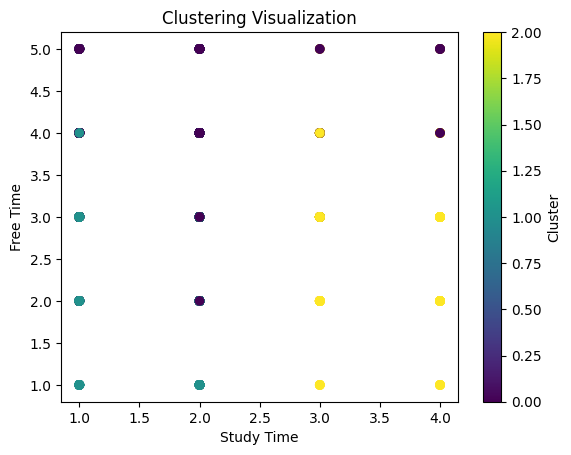

In [47]:
# Visualisasi clustering
plt.scatter(clustering_data['studytime'], clustering_data['freetime'], c=clusters, cmap='viridis')
plt.title("Clustering Visualization")
plt.xlabel("Study Time")
plt.ylabel("Free Time")
plt.colorbar(label="Cluster")
plt.show()

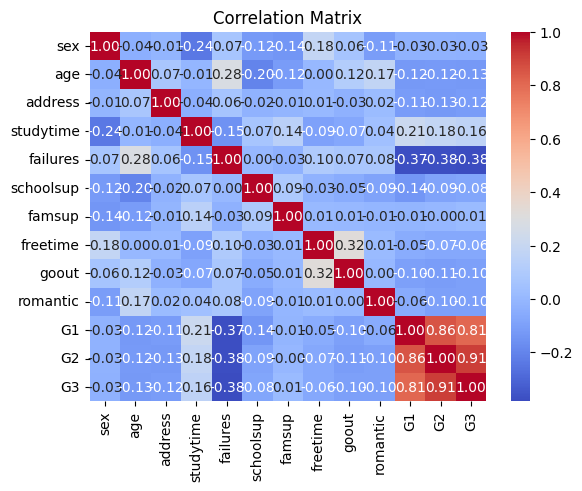

In [32]:
# Tambahan korelasi matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


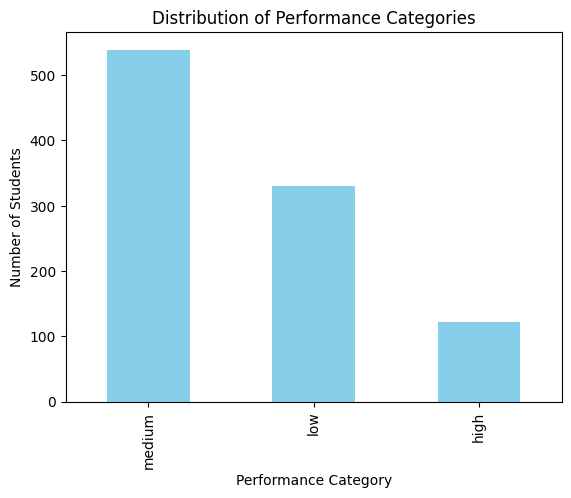

In [33]:
# Distribusi murid berdasarkan performance kategorinya
y_class.value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Performance Categories")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.show()


In [34]:
# Menggali lebih dalam informasi tiap cluster
clustering_data['Cluster'] = clusters
print(clustering_data.groupby('Cluster').mean())


         studytime  freetime     goout
Cluster                               
0         1.706573  3.767606  4.213615
1         1.627962  2.765403  2.303318
2         3.280612  2.908163  2.693878


In [39]:
### DARI SINI NYOBA2 CLUSTERING

from sklearn.preprocessing import StandardScaler
# Pilih kolom untuk clustering
X_clustering = data[['studytime', 'freetime', 'goout']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)  # Standarisasi fitur


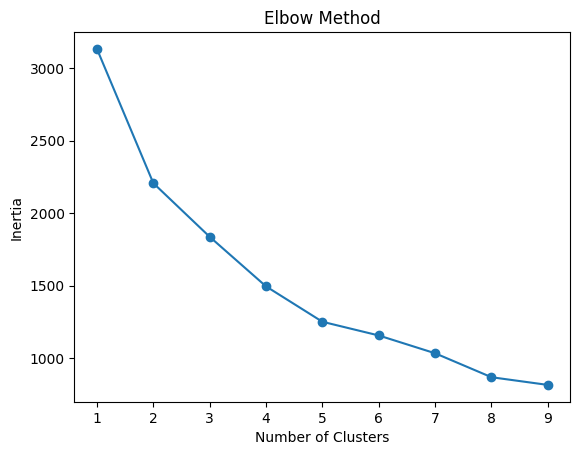

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Hitung inertia untuk berbagai jumlah cluster
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


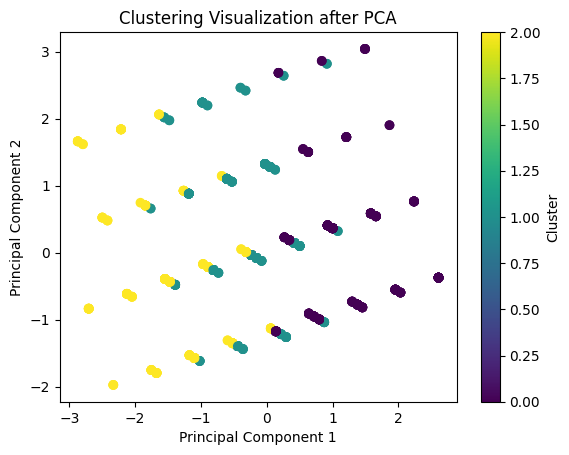

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plot visualisasi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization after PCA')
plt.show()


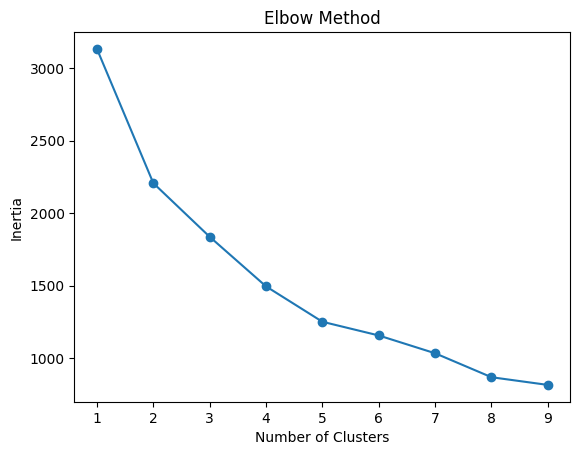

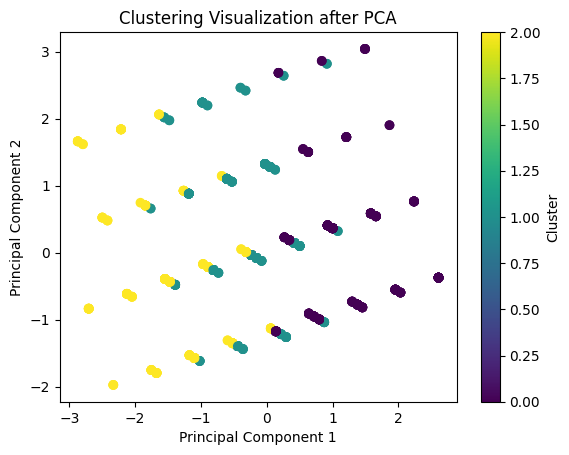

         studytime  freetime     goout
Cluster                               
0         1.651106  3.776413  4.230958
1         2.253589  3.423445  2.466507
2         2.022831  1.707763  2.474886


In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pilih kolom untuk clustering
X_clustering = data[['studytime', 'freetime', 'goout']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Tentukan jumlah cluster optimal menggunakan Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Misalnya, dari Elbow Method, kita pilih 3 cluster
n_clusters = 3

# Lakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reduksi dimensi dengan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization after PCA')
plt.show()

# Analisis karakteristik cluster
clustering_data = data[['studytime', 'freetime', 'goout']].copy()
clustering_data['Cluster'] = clusters
print(clustering_data.groupby('Cluster').mean())